In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('fear_greed_index.csv')
df2 = pd.read_csv('historical_data.csv')

In [3]:
df2['Timestamp IST'].unique()

array(['02-12-2024 22:50', '02-12-2024 22:51', '02-12-2024 22:54', ...,
       '24-04-2025 17:33', '24-04-2025 17:34', '25-04-2025 15:35'],
      dtype=object)

In [4]:
df2['Timestamp IST'].unique()

array(['02-12-2024 22:50', '02-12-2024 22:51', '02-12-2024 22:54', ...,
       '24-04-2025 17:33', '24-04-2025 17:34', '25-04-2025 15:35'],
      dtype=object)

In [5]:
df2['Time']=df2['Timestamp IST'].str.split(" ").str[1]

In [6]:
df2['Date']=pd.to_datetime(df2['Timestamp IST'].str.split(" ").str[0],format="%d-%m-%Y")

In [7]:
df2['Date']=pd.to_datetime(df2['Date'].dt.strftime("%Y-%m-%d")).dt.date

In [8]:
df1.date = pd.to_datetime(df1['date']).dt.date

In [9]:
df3 = pd.merge(df2,df1,how='inner',left_on='Date',right_on='date')

In [10]:
df3.classification.value_counts()

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [11]:
df2.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Time', 'Date'],
      dtype='object')

In [12]:
df3.drop(columns=['Timestamp','Trade ID','Time','Transaction Hash','date'],inplace=True)

In [13]:
df3

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Order ID,Crossed,Fee,Date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,52017706630,True,0.345404,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,52017706630,True,0.005600,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,52017706630,True,0.050431,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,52017706630,True,0.050043,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,52017706630,True,0.003055,2024-12-02,1733117400,80,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211213,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,88803313862,False,0.042080,2025-04-25,1745559000,60,Greed
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,88803313862,False,0.233863,2025-04-25,1745559000,60,Greed
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,88803313862,False,0.046616,2025-04-25,1745559000,60,Greed
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,88803313862,False,0.396337,2025-04-25,1745559000,60,Greed


<Axes: ylabel='classification'>

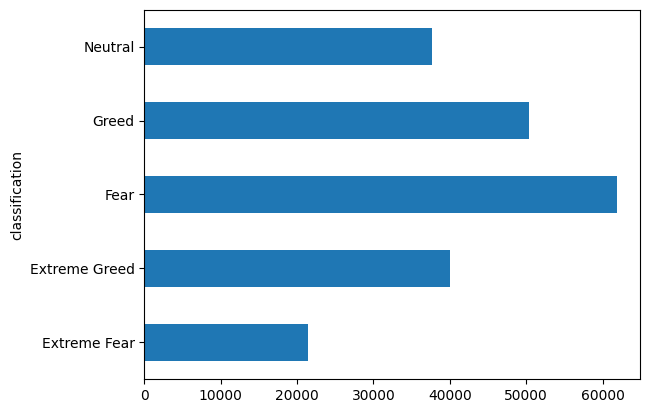

In [14]:
df3.groupby('classification')['Order ID'].count().plot(kind='barh')

In [16]:
df3[(df3['Coin'] == 'FARTCOIN') & ((df3['classification'] == 'Greed') | (df3['classification'] == 'Fear'))].sample(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Order ID,Crossed,Fee,Date,timestamp,value,classification
59127,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,FARTCOIN,1.15410,7211.2,8322.45,BUY,23-04-2025 12:28,-7211.2,Close Short,187.563312,88234896563,True,2.912856,2025-04-23,1745386200,72,Greed
32714,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,FARTCOIN,1.26600,158.0,200.03,BUY,20-12-2024 21:37,-18784.4,Close Short,10.270000,57119243076,False,0.019201,2024-12-20,1734672600,74,Greed
135608,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,FARTCOIN,0.94447,38.9,36.74,SELL,31-12-2024 01:46,-253.9,Open Short,0.000000,59661098393,True,0.012858,2024-12-31,1735623000,64,Greed
202331,0x92f17e8d81a944691c10e753af1b1baae1a2cd0d,FARTCOIN,0.98387,4125.7,4059.15,SELL,29-01-2025 19:06,-202997.9,Open Short,0.000000,67471786587,True,1.420703,2025-01-29,1738128600,72,Greed
202011,0x92f17e8d81a944691c10e753af1b1baae1a2cd0d,FARTCOIN,0.82210,5890.4,4842.50,SELL,29-01-2025 04:00,-428137.2,Open Short,0.000000,67326862957,True,1.694874,2025-01-29,1738128600,72,Greed
202478,0x92f17e8d81a944691c10e753af1b1baae1a2cd0d,FARTCOIN,0.63043,3888.6,2451.49,BUY,02-02-2025 04:53,68093.5,Open Long,0.000000,68338817477,True,0.858021,2025-02-02,1738474200,60,Greed
59724,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,FARTCOIN,1.08500,461.7,500.94,SELL,24-04-2025 02:39,11340.6,Close Long,-12.308922,88420477708,False,0.050094,2025-04-24,1745472600,63,Greed
110884,0x8477e447846c758f5a675856001ea72298fd9cb5,FARTCOIN,0.73721,271.1,199.86,BUY,10-04-2025 06:21,-8431.3,Close Short,0.200614,85462078625,True,0.069950,2025-04-10,1744263000,39,Fear
203003,0x92f17e8d81a944691c10e753af1b1baae1a2cd0d,FARTCOIN,1.17800,6387.2,7524.12,BUY,23-04-2025 03:30,470814.4,Open Long,0.000000,88114061619,True,2.633442,2025-04-23,1745386200,72,Greed
32723,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,FARTCOIN,1.26690,12.0,15.20,BUY,20-12-2024 21:37,-16090.6,Close Short,0.769200,57119374599,False,0.001459,2024-12-20,1734672600,74,Greed


In [17]:
df_samp = df3[df3['Coin'].isin(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX'])]

In [18]:
df_samp.groupby(['Coin','classification'])['Execution Price'].mean()

Coin   classification
@107   Extreme Fear       15.653997
       Extreme Greed      20.878618
       Fear               17.853854
       Greed              24.753124
       Neutral            23.596597
AAVE   Extreme Fear      196.516429
       Extreme Greed     260.957241
       Fear              158.419514
       Greed             280.310261
       Neutral           133.365925
AIXBT  Extreme Fear        0.069378
       Extreme Greed       0.764821
       Fear                0.132279
       Greed               0.359104
       Neutral             0.495823
DYDX   Extreme Fear        0.585677
       Extreme Greed       2.346151
       Fear                0.632527
       Greed               1.969533
       Neutral             0.770147
GMX    Extreme Fear       12.813308
       Extreme Greed      44.940456
       Greed              15.024972
       Neutral            18.274214
Name: Execution Price, dtype: float64

In [19]:
df_samp['Coin'].unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX'], dtype=object)

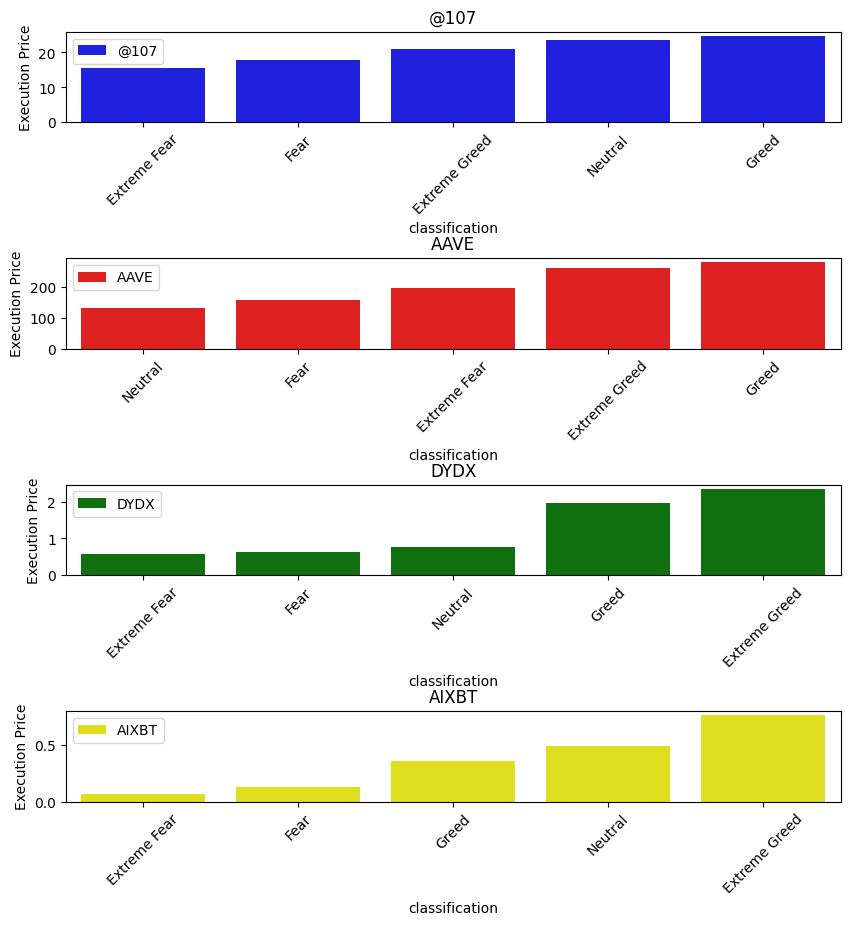

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, figsize=(10, 10))
colors = ['blue', 'red', 'green', 'yellow']
val = df_samp['Coin'].unique()

for i in range(4):
    # Filter the DataFrame for the current coin
    df_plot = df_samp[df_samp['Coin'] == val[i]]
    
    # Group by classification and get mean Execution Price (or sum, or count as needed)
    df_sorted = df_plot.groupby('classification', as_index=False)['Execution Price'].mean()
    
    # Sort by value so largest is last = rightmost bar
    df_sorted = df_sorted.sort_values(by='Execution Price', ascending=True)
    
    sns.barplot(
        data=df_sorted,
        x='classification',
        y='Execution Price',
        color=colors[i],
        label=val[i],
        ax=axes[i]
    )
    axes[i].set_title(f"{val[i]}")
    axes[i].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=1.5)
plt.show()


In [21]:
# from here we can roughly see the execution price is higher during extreme greed and greed conditions

In [22]:
df3.groupby(['classification','Side'])['Side'].count()

classification  Side
Extreme Fear    BUY     10935
                SELL    10465
Extreme Greed   BUY     17940
                SELL    22052
Fear            BUY     30270
                SELL    31567
Greed           BUY     24576
                SELL    25727
Neutral         BUY     18969
                SELL    18717
Name: Side, dtype: int64

In [23]:
daily = df3.groupby(['Date', 'classification']).agg({
    'Closed PnL': 'mean',
    'Size USD': 'sum',
    'Account': 'count'
}).rename(columns={
    'Closed PnL': 'Avg_PnL',
    'Size USD': 'Total_Volume',
    'Account': 'Num_Trades'
})

In [24]:
daily

,,Avg_PnL,Total_Volume,Num_Trades
Date,classification,,,
2023-05-01,Greed,0.000000,477.00,3
2023-12-05,Extreme Greed,0.000000,50005.83,9
2023-12-14,Greed,-18.675885,113203.35,11
2023-12-15,Greed,-12.316017,10609.95,2
2023-12-16,Greed,0.000000,15348.77,3
...,...,...,...,...
2025-04-27,Greed,8.018004,487537.69,337
2025-04-28,Neutral,26.763462,26124921.49,1379
2025-04-29,Greed,56.063136,34089511.66,2243


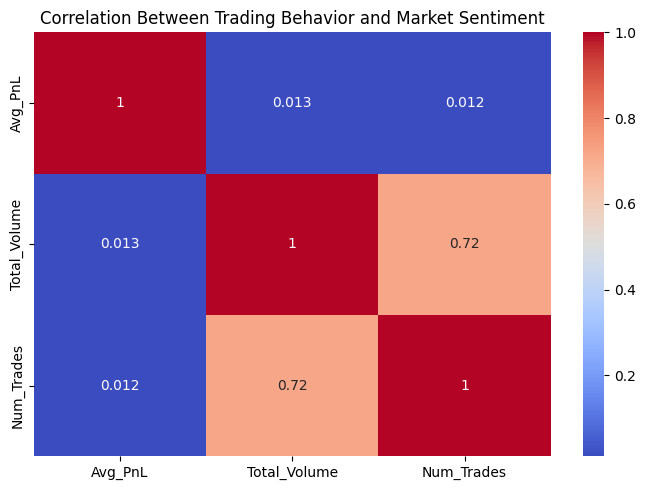

In [25]:
plt.figure(figsize=(7, 5))
sns.heatmap(daily[['Avg_PnL', 'Total_Volume', 'Num_Trades']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Trading Behavior and Market Sentiment")
plt.tight_layout()
plt.show()

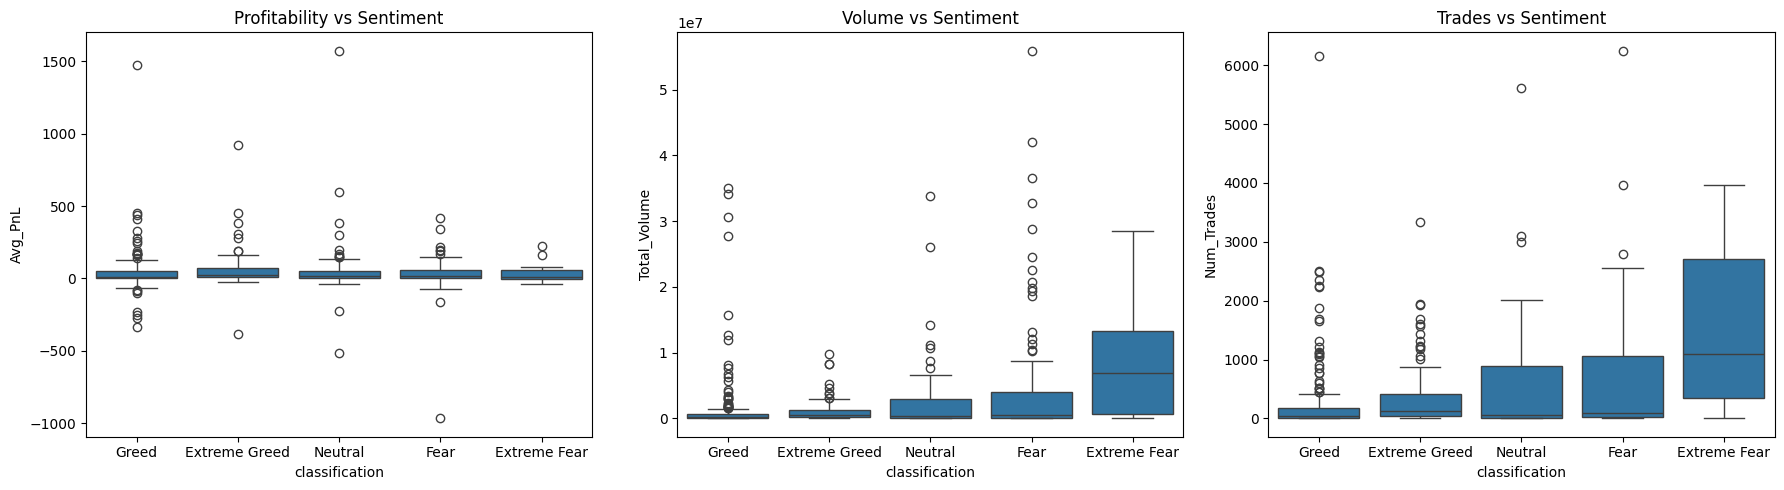

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=daily, x='classification', y='Avg_PnL', ax=axs[0])
sns.boxplot(data=daily, x='classification', y='Total_Volume', ax=axs[1])
sns.boxplot(data=daily, x='classification', y='Num_Trades', ax=axs[2])
axs[0].set_title('Profitability vs Sentiment')
axs[1].set_title('Volume vs Sentiment')
axs[2].set_title('Trades vs Sentiment')
plt.tight_layout()
plt.show()


### Some Fear days show massive volume spikes — may signal institutional accumulation or capitulation.

In [27]:
df3['Order ID'] = df3['Order ID'].astype(str) + df3['Coin']  # or another unique ID

volume_per_trade = df3.groupby(['Date', 'classification']).agg({
    'Size USD': 'sum',
    'Order ID': 'nunique'
}).reset_index()

volume_per_trade['Volume_per_Trade'] = volume_per_trade['Size USD'] / volume_per_trade['Order ID']
print(volume_per_trade.groupby('classification')['Volume_per_Trade'].describe())


                count          mean           std          min           25%  \
classification                                                                 
Extreme Fear     14.0  30247.442620  23230.242397  2672.973043  12625.881295   
Extreme Greed   114.0  15141.642973  13662.933407   499.997500   5275.039482   
Fear             91.0  44180.418660  66633.670933     0.110000   9205.601480   
Greed           193.0  24143.230119  21375.527262   330.558182   7882.794286   
Neutral          67.0  32517.846234  33275.628713   507.400000   9103.600509   

                         50%           75%            max  
classification                                             
Extreme Fear    27573.122075  49002.262883   74366.683516  
Extreme Greed    9918.659915  21593.677785   70347.194000  
Fear            22395.742500  48855.412500  375265.889195  
Greed           18462.868191  34307.780676  131619.736139  
Neutral         22450.082500  45183.538461  165648.120000  


### From here we can see extreme fear and fear see the highest trade volumne as people tends to accumulate for in fear and during extreme fear they sell of

In [28]:
df3.groupby('classification')['value'].mean().round(2)

classification
Extreme Fear     19.69
Extreme Greed    79.55
Fear             33.20
Greed            67.98
Neutral          48.66
Name: value, dtype: float64

<Axes: xlabel='classification', ylabel='count'>

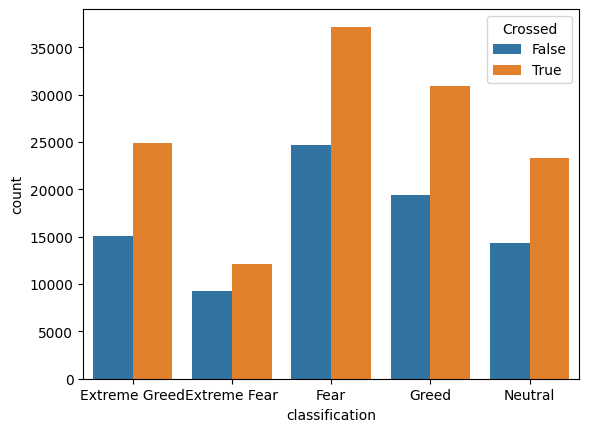

In [29]:
sns.countplot(df3,x=df3['classification'],hue=df3['Crossed'])

In [30]:
# we can see that for most classification , all are market orders indicating higher risk or urgency 

In [31]:
df3

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Order ID,Crossed,Fee,Date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,52017706630@107,True,0.345404,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,52017706630@107,True,0.005600,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,52017706630@107,True,0.050431,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,52017706630@107,True,0.050043,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,52017706630@107,True,0.003055,2024-12-02,1733117400,80,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211213,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,88803313862FARTCOIN,False,0.042080,2025-04-25,1745559000,60,Greed
211214,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,88803313862FARTCOIN,False,0.233863,2025-04-25,1745559000,60,Greed
211215,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,88803313862FARTCOIN,False,0.046616,2025-04-25,1745559000,60,Greed
211216,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,88803313862FARTCOIN,False,0.396337,2025-04-25,1745559000,60,Greed


### Leverage

In [32]:
df3['Leverage'] = df3['Start Position'] / df3['Size USD']
df3['Leverage'].replace([np.inf, -np.inf], np.nan, inplace=True)

daily_stats = df3.groupby('Date').agg({
    'Leverage': 'mean',
    'Closed PnL': 'mean',
    'Size USD': 'sum',
    'Fee': 'mean'
}).reset_index()

C:\Users\sayan\AppData\Local\Temp\ipykernel_1844\3723154845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Leverage'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [33]:
new_df = pd.merge(daily_stats,df1,how='inner',left_on='Date',right_on='date')

<Axes: xlabel='classification', ylabel='Leverage'>

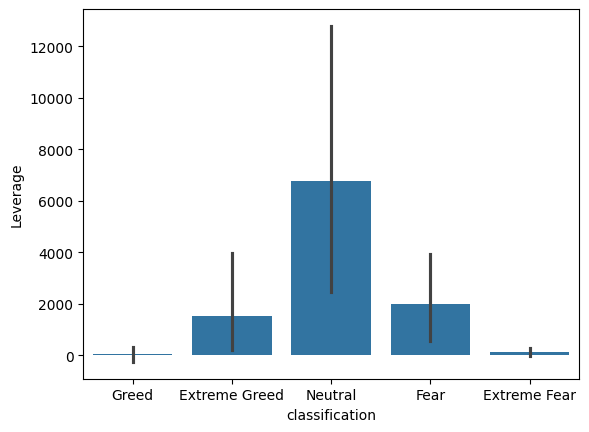

In [34]:
sns.barplot(x=new_df['classification'],y=new_df['Leverage'])

### Leverage in trading refers to using borrowed funds to increase the size of your position — allowing you to control more money than you actually have. So its common that during neutral there is lower chance of risk or market crash so people tend to use leverage

## Checking for Profitability

Win rate for Extreme Greed is 0.46494298859771954
Lose rate for Extreme Greed is 0.05648629725945189
Win rate for Extreme Fear is 0.370607476635514
Lose rate for Extreme Fear is 0.11565420560747663
Win rate for Fear is 0.42076750165758364
Lose rate for Fear is 0.06127399453401685
Win rate for Greed is 0.38482794266743536
Lose rate for Greed is 0.11565910581873845
Win rate for Neutral is 0.3969909250119408
Lose rate for Neutral is 0.08485909886960676


C:\Users\sayan\AppData\Local\Temp\ipykernel_1844\427583751.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=win_rate_by_sentiment, x='classification', y='Win Rate', palette='viridis', ax=axes[0])
C:\Users\sayan\AppData\Local\Temp\ipykernel_1844\427583751.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=win_rate_by_sentiment, x='classification', y='Lose Rate', palette='magma', ax=axes[1])


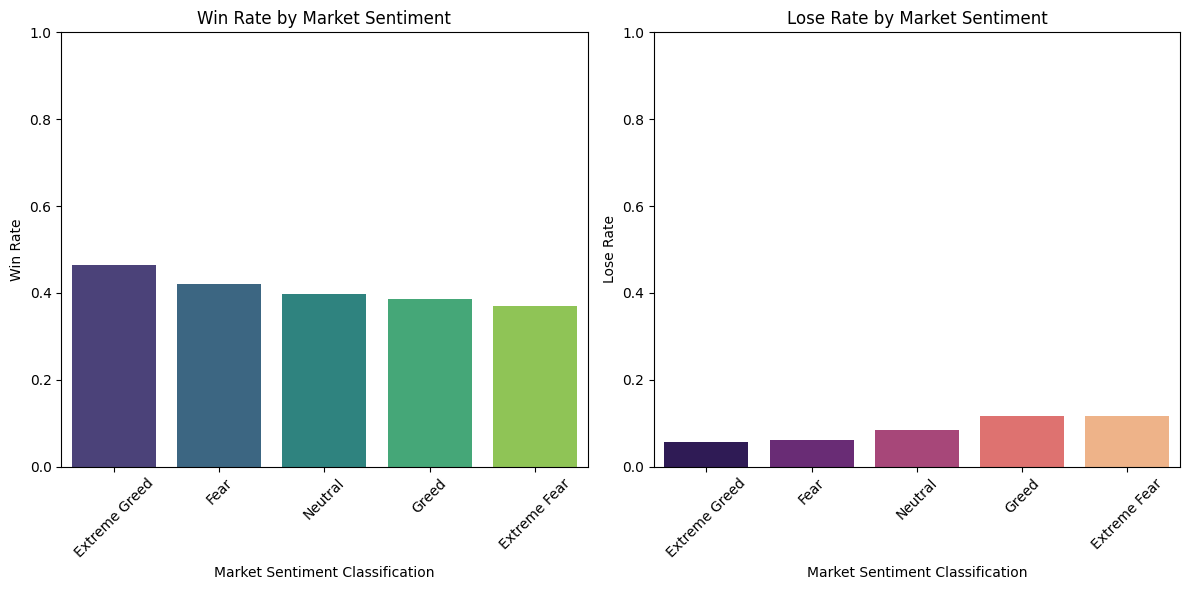

In [36]:
trades = df3.copy()
trades['win'] = trades['Closed PnL'] > 0
trades['lose'] = trades['Closed PnL'] < 0

win_rate_by_sentiment = trades.groupby('classification')[['win', 'lose']].mean().reset_index()
win_rate_by_sentiment.rename(columns={'win': 'Win Rate', 'lose': 'Lose Rate'}, inplace=True)
win_rate_by_sentiment = win_rate_by_sentiment.sort_values(['Win Rate', 'Lose Rate'], ascending=False)

for i in trades.classification.unique():
    print(f"Win rate for {i} is {len(trades[(trades['Closed PnL']>0) & (trades['classification']==i)])/len(trades[trades['classification']==i])}")
    print(f"Lose rate for {i} is {len(trades[(trades['Closed PnL']<0) & (trades['classification']==i)])/len(trades[trades['classification']==i])}")

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.barplot(data=win_rate_by_sentiment, x='classification', y='Win Rate', palette='viridis', ax=axes[0])
axes[0].set_title("Win Rate by Market Sentiment")
axes[0].set_xlabel("Market Sentiment Classification")
axes[0].set_ylabel("Win Rate")
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=win_rate_by_sentiment, x='classification', y='Lose Rate', palette='magma', ax=axes[1])
axes[1].set_title("Lose Rate by Market Sentiment")
axes[1].set_xlabel("Market Sentiment Classification")
axes[1].set_ylabel("Lose Rate")
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Win rate denoting profitability is higher in extreme greed as people sell their coins and get higher profit while extreme fear denotes the lowest profit as the pnl stays in negative for most people
### Similarly as we said lose rate denoting loss in lowest in extreme greed but there is a anomaly showing high loss in greed maybe people started buying more and their average buying got reduced resulting in a negative closing pnl

### Volatility ( St dev of Risk)

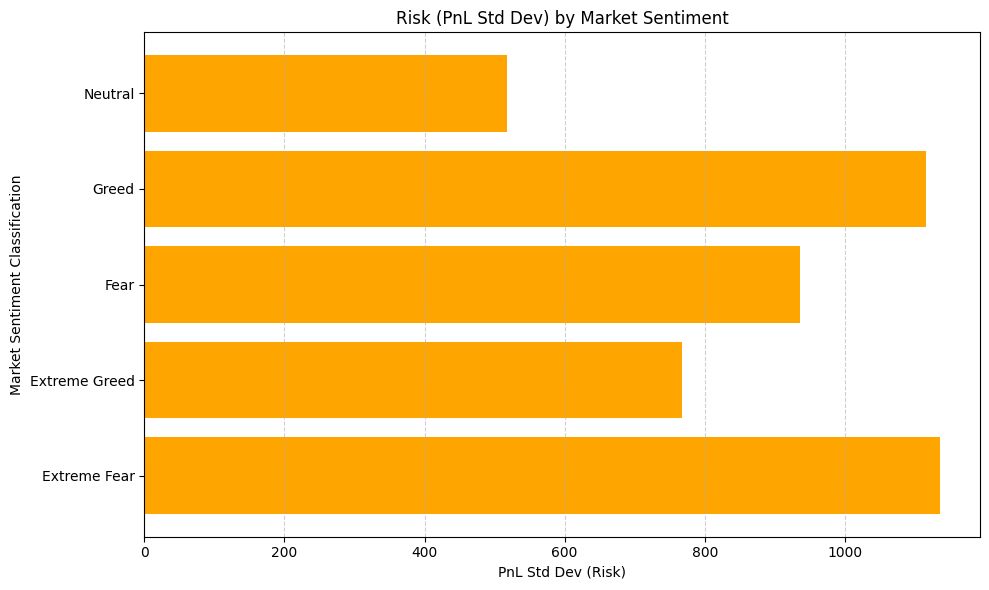

In [37]:
risk_by_sentiment = trades.groupby('classification')['Closed PnL'].std().reset_index()
risk_by_sentiment.rename(columns={'Closed PnL': 'PnL Std Dev (Risk)'}, inplace=True)
risk_by_sentiment
plt.figure(figsize=(10, 6))
plt.barh(risk_by_sentiment['classification'], risk_by_sentiment['PnL Std Dev (Risk)'], color='orange')
plt.xlabel("PnL Std Dev (Risk)")
plt.ylabel("Market Sentiment Classification")
plt.title("Risk (PnL Std Dev) by Market Sentiment")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Extreme fear and greed shows extreme volatility showing higher risk index among traders

### Downside Risk

In [38]:
trades['downside'] = trades['Closed PnL'].apply(lambda x: x if x < 0 else 0)
downside_risk = trades.groupby('classification')['downside'].std().reset_index()
downside_risk.rename(columns={'downside': 'Downside Risk'}, inplace=True)
downside_risk

,classification,Downside Risk
0,Extreme Fear,412.111433
1,Extreme Greed,160.140562
2,Fear,287.195987
3,Greed,761.657797
4,Neutral,221.304323


C:\Users\sayan\AppData\Local\Temp\ipykernel_1844\908536075.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trades.groupby('size_bucket')['win'].mean().plot(kind='bar', title='Win Rate by Trade Size')


<Axes: title={'center': 'Win Rate by Trade Size'}, xlabel='size_bucket'>

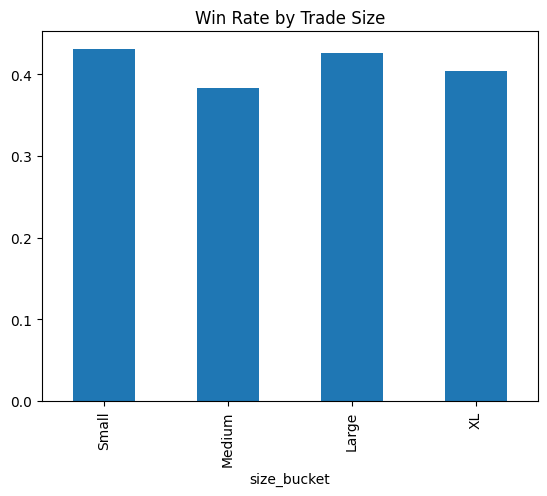

In [39]:
trades['size_bucket'] = pd.qcut(trades['Size USD'], 4, labels=["Small", "Medium", "Large", "XL"])
trades.groupby('size_bucket')['win'].mean().plot(kind='bar', title='Win Rate by Trade Size')


<Axes: title={'center': 'Hourly Avg PnL'}, xlabel='hour'>

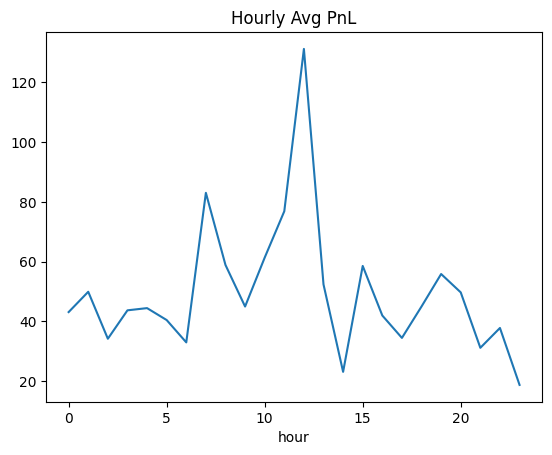

In [43]:
trades['hour']=pd.to_datetime(trades['Timestamp IST'], format="%d-%m-%Y %H:%M").dt.hour
trades.groupby('hour')['Closed PnL'].mean().plot(kind='line', title='Hourly Avg PnL')

<Axes: title={'center': 'Win Rate by Day of Week'}, xlabel='day'>

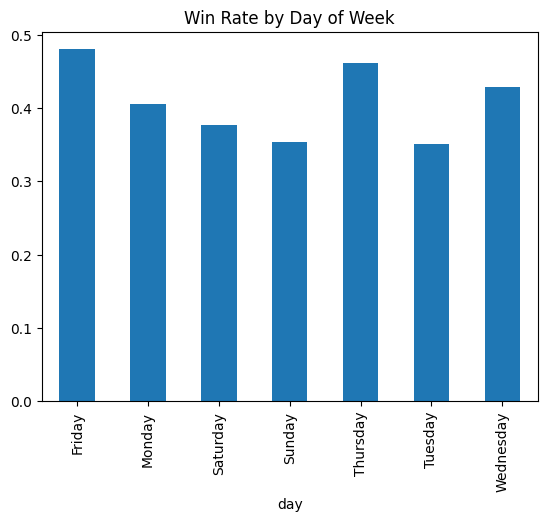

In [44]:
trades['day'] = pd.to_datetime(trades['Timestamp IST'],format="%d-%m-%Y %H:%M").dt.day_name()
trades.groupby('day')['win'].mean().plot(kind='bar', title='Win Rate by Day of Week')